In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

In [16]:
X_full = sklearn.datasets.load_iris()["data"]

In [47]:
y = sklearn.datasets.load_iris()["target"]

In [49]:
sklearn.datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
X_full[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
X_full.shape

(150, 4)

In [19]:
X = X_full[:, [0, 1]]

In [20]:
X = StandardScaler().fit_transform(X)

In [21]:
def plot_points(X, labels, centroids=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X[:, 0], 
        X[:, 1],
        c=labels,
    )
    if centroids is not None:
        plt.scatter(
            centroids[:, 0], 
            centroids[:, 1],
            c="red",
            s=100,
        )
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

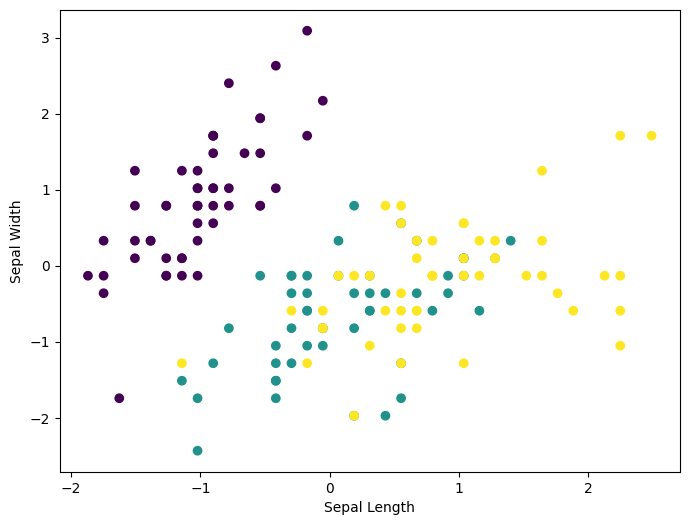

In [48]:
plot_points(X, y)

<h1>K means</h1>

In [22]:
from sklearn.cluster import KMeans

In [23]:
num_clusters = 3

In [24]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [25]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

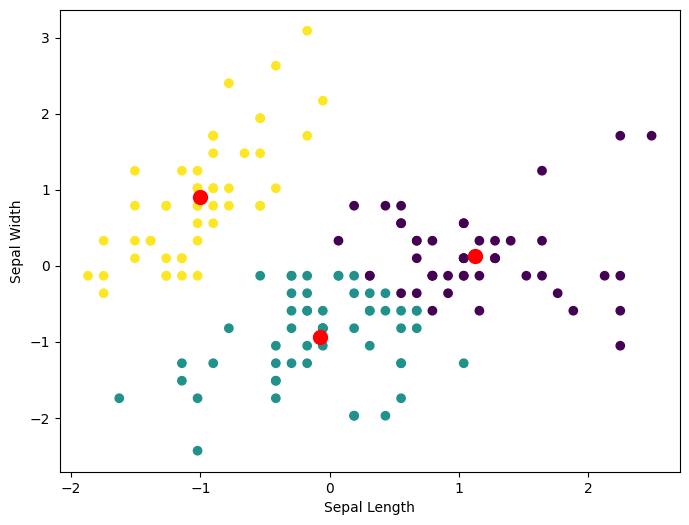

In [26]:
plot_points(X, labels, centroids)

In [43]:
def fit_kmeans(n_clusters):
    kmeans = KMeans(n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    plot_points(X, labels, centroids)

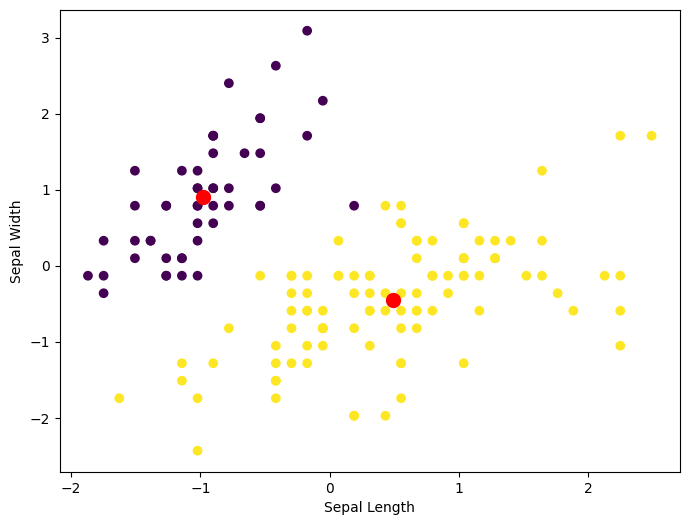

In [44]:
fit_kmeans(2)

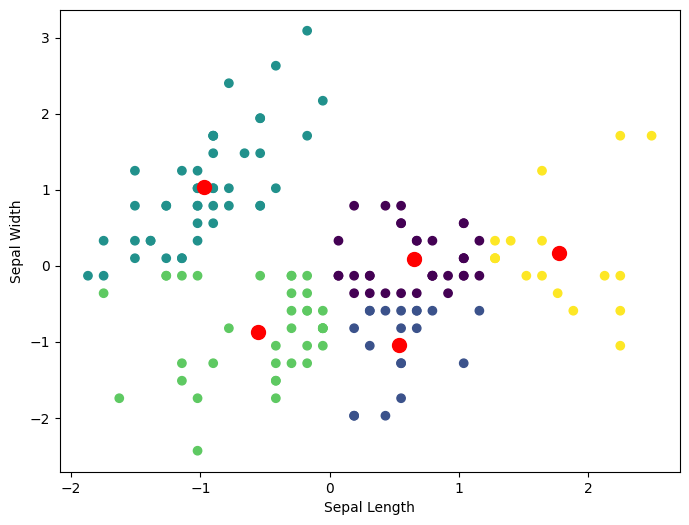

In [45]:
fit_kmeans(5)

<h1>Hierarchical clustering</h1>

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
num_clusters = 3

In [29]:
hc = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

In [30]:
labels = hc.fit_predict(X)

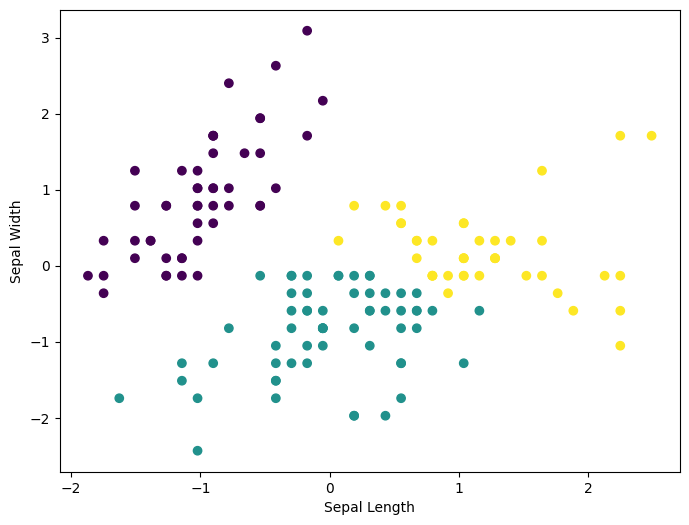

In [31]:
plot_points(X, labels)

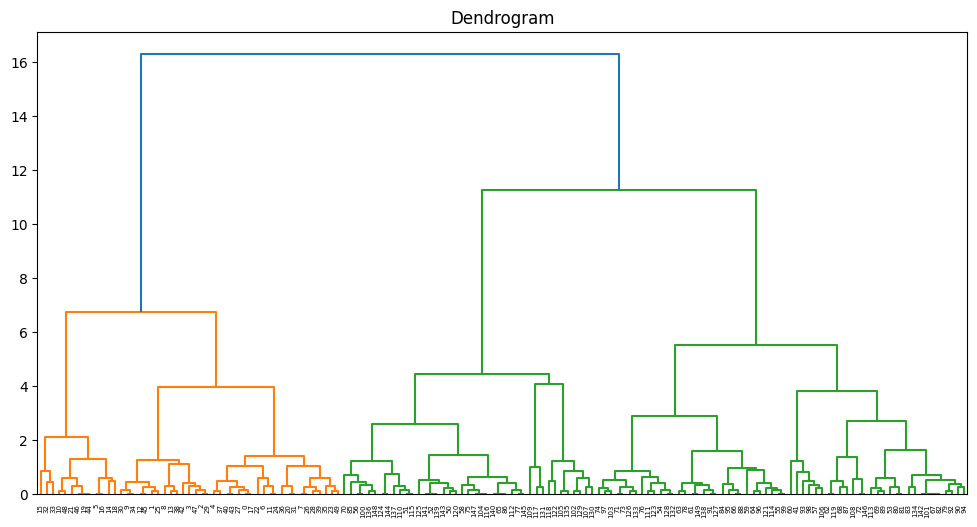

In [32]:
z = linkage(X, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(z)
plt.title('Dendrogram')
plt.show()

<h1>Gaussian mixture</h1>

In [33]:
from sklearn.mixture import GaussianMixture

In [34]:
num_components = 3

In [35]:
gmm = GaussianMixture(
    n_components=num_components,
    covariance_type='full',
    random_state=42
)

gmm.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [36]:
labels = gmm.predict(X)

In [39]:
means = gmm.means_

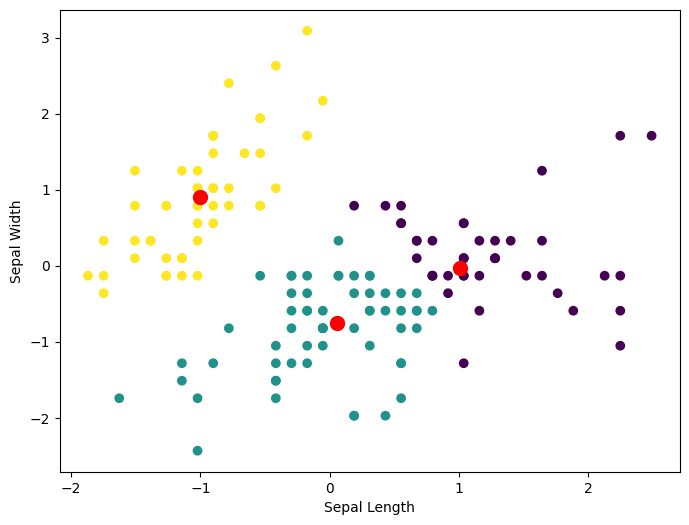

In [40]:
plot_points(X, labels, means)